In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

### Carregamento e junção dos dados

In [16]:
from preprocessamento_escola_2011 import escolas_info_train, escolas_info_test

O módulo acima carrega os dados e os divide entre conjunto de treinamento(Para análise exploratória) e conjunto de teste(para validação de hipóteses). Os conjuntos já agrupam os questionários com as médias em língua portuguesa e matemática, além de renomear as questões com um nome mais significativo.
As questões também foram agrupadas em categorias(INFRA, SEGURANCA, RECURSOS e BIBLIOTECA) para facilitar possíveis agrupamentos posteriores.

In [15]:
escolas_info_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18202 entries, 0 to 18201
Data columns (total 80 columns):
ID_PROVA_BRASIL                                     18202 non-null object
ID_UF                                               18202 non-null object
ID_MUNICIPIO                                        18202 non-null object
ID_ESCOLA                                           18202 non-null object
ID_DEPENDENCIA_ADM                                  18202 non-null object
ID_LOCALIZACAO                                      18202 non-null object
IN_PREENCHIMENTO                                    18202 non-null object
Q_INFRA_TELHADO                                     18202 non-null object
Q_INFRA_PAREDES                                     18202 non-null object
Q_INFRA_PISO                                        18202 non-null object
Q_INFRA_ENTRADA_PREDIO                              18202 non-null object
Q_INFRA_PATIO                                       18202 non-null object
Q_I

### Limpeza inicial dos dados

In [18]:
def codificar_questoes(questionario_pd):
    questionario_tratado_pd = questionario_pd.copy()
    for questoes in questionario_tratado_pd.filter(regex='Q_.*').columns:
        questionario_tratado_pd[questoes] = questionario_pd[questoes].map({'A': 3, 'B': 2, 'C': 1, 'D': 0}).fillna(-1)
    
    return questionario_tratado_pd


def limpar_score(questionario_pd, score_names):
    questionario_tratado_pd = questionario_pd.copy()
    for score in score_names:
        questionario_tratado_pd[score] = questionario_pd[score].str.strip().str.replace(',', '.').str.replace('^$', '-1').astype(float)
    
    return questionario_tratado_pd

In [20]:
escolas_train_clean = limpar_score(codificar_questoes(escolas_info_train), ['MEDIA_MT', 'MEDIA_LP'])

### Checagem de correlações

In [25]:
escolas_info_clean_pd = escolas_train_clean.copy()
escolas_info_clean_pd['MEDIA_LP'] = escolas_train_clean['MEDIA_LP']
escolas_questoes_lp = escolas_train_clean.filter(regex='(Q_.*|MEDIA_LP)')
media_lp_corrs = escolas_questoes_lp.corr()['MEDIA_LP']
media_lp_corrs.sort_values(ascending=False).index[1:11]

Index(['Q_RECURSOS_LINHA_TELEFONICA', 'Q_RECURSOS_APARELHOS_DE_FAX',
       'Q_RECURSOS_QUADRA_ESPORTIVA', 'Q_RECURSOS_BIBLIOTECA',
       'Q_BIBLIOTECA_ALUNOS_PODEM_LEVAR_LIVROS',
       'Q_RECURSOS_INTERNET_PARA_ALUNOS', 'Q_BIBLIOTECA_PESSOA_NO_ATENDIMENTO',
       'Q_RECURSOS_RETROPROJETOR',
       'Q_BIBLIOTECA_PROFESSORES_PODEM_LEVAR_LIVROS',
       'Q_RECURSOS_COMPUTADORES_ADMINISTRACAO'],
      dtype='object')

### Distribuição das médias em Língua Portuguesa

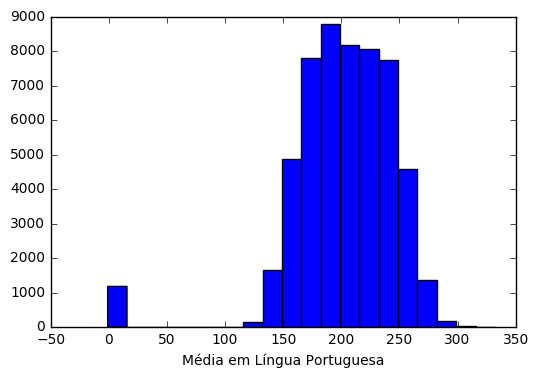

In [26]:
plt.hist(escolas_train_clean['MEDIA_LP'], bins=20)
plt.xlabel('Média em Língua Portuguesa')
plt.show()

### Gráfico de correlação entre Qualidade da Biblioteca e Média em Língua Portuguesa

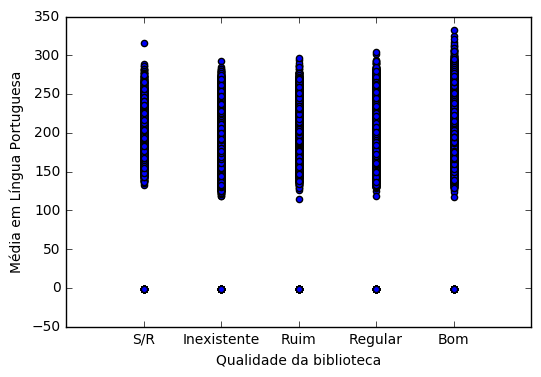

In [28]:
# Qualidade da biblioteca, de acordo com o dicionario de dados, encontra-se no campo TX_RESP_Q050
plt.scatter(escolas_train_clean['Q_RECURSOS_BIBLIOTECA'], escolas_train_clean['MEDIA_LP'])
plt.xlabel('Qualidade da biblioteca')
plt.ylabel('Média em Língua Portuguesa')
plt.xticks([-1, 0, 1, 2, 3], ['S/R', 'Inexistente', 'Ruim', 'Regular', 'Bom'])
plt.show()